<a href="https://colab.research.google.com/github/lmntrx-sys/Research/blob/main/Deep_learning__basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# fetch the data path
data_path = fetch_california_housing(as_frame=True)

In [ ]:
df = pd.DataFrame(data_path.data, columns=data_path.feature_names)
df['target'] = data_path.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


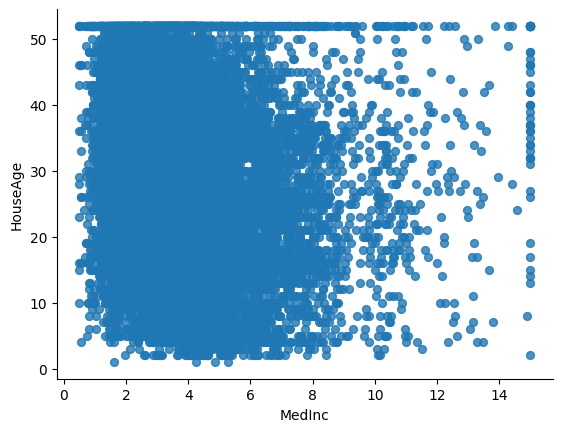

In [ ]:
# @title MedInc vs HouseAge

df.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

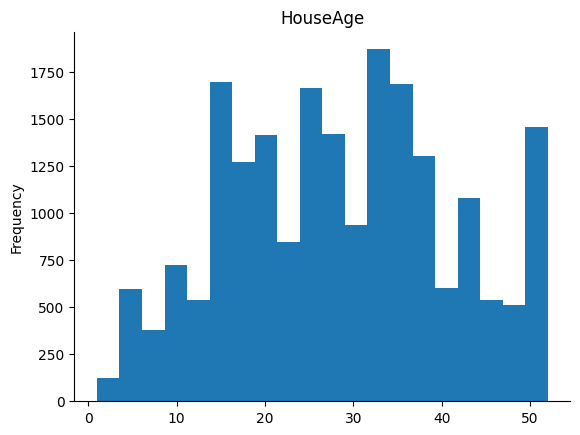

In [ ]:
# @title HouseAge

df['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

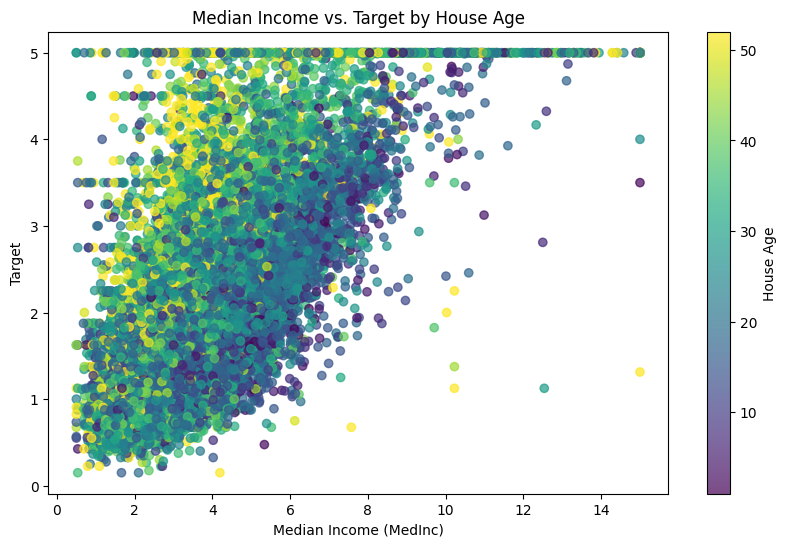

In [ ]:
# @title Median Income vs. Target by House Age

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], df['target'], c=df['HouseAge'], cmap='viridis', alpha=0.7)
plt.colorbar(label='House Age')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Target')
_ = plt.title('Median Income vs. Target by House Age')

  From the plot you can see the shape of Carlifonia

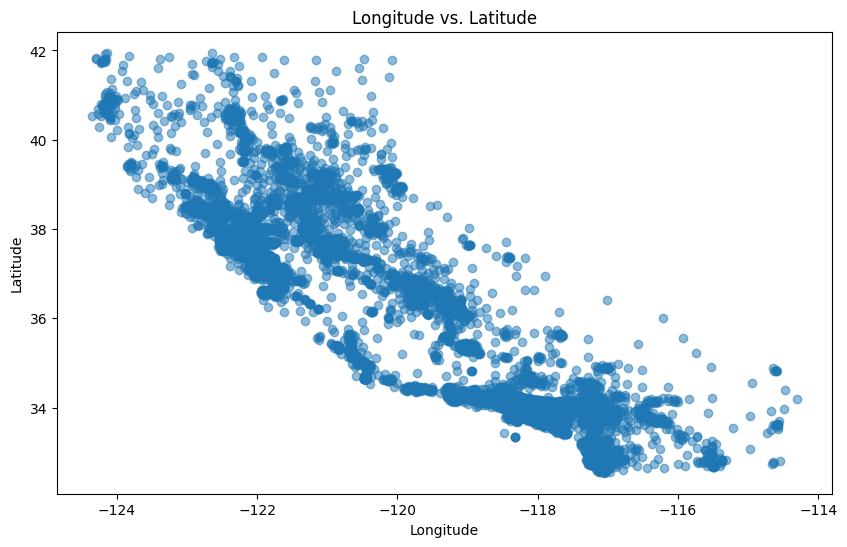

In [ ]:
# Plot the longitudes and latitudes to see the area in which the houses lie

longitudes = df['Longitude']
latitudes = df['Latitude']


plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs. Latitude')
plt.grid(False)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df['target'].describe().head()

,target
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000


In [ ]:
df['MedInc'].describe().head()

,MedInc
count,20640.000000
mean,3.870671
std,1.899822
min,0.499900
25%,2.563400


In [ ]:
df['MedInc'].sort_values(ascending=False).head()

,MedInc
4352,15.0001
10673,15.0001
8849,15.0001
4606,15.0001
5257,15.0001


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
_, X_train, _, y_train = train_test_split(df[['MedInc']], df['target'], test_size=0.2, random_state=42)
_, X_test, _, y_test = train_test_split(df[['MedInc']], df['target'], test_size=0.2, random_state=42)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 0.7089202241832743


In [ ]:
loss = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Loss: {loss}')

Loss: 0.841974004458139


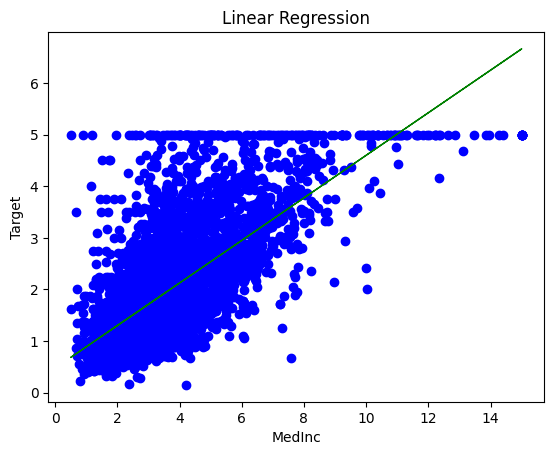

In [ ]:
# plot the line of best fit
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='green', linewidth=1)
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.show()

# Train a Support vector machine to fit the data

In [ ]:
from sklearn.svm import SVR

In [ ]:
#split the data into training and testing sets
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the lengths of the training and testing sets
len(X_train), len(y_train), len(X_test), len(y_test)

# fit the model to the data
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 1.1799737794338485
